In [1]:
import osmnx as ox
ox.config(log_file=True, log_console=True, use_cache=True)
ox.__version__

import networkx as nx

import pandas as pd
from pandas import DataFrame

import pandana, matplotlib.pyplot as plt
%matplotlib inline
from pandana.loaders import osm

from shapely.geometry import Point

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import xlsxwriter
import openpyxl
import osmnx as ox
ox.config(log_file=True, log_console=True, use_cache=True)
ox.__version__

'0.10'

# Alicante, Plaza de Los Luceros
## 38.3459813, -0.49069405

In [4]:
point = (38.3459813, -0.49069405)
dist = 300
networkType = 'walk'

# Find the latitude and logitude of the 4 corners of the cut

In [4]:
#####Find the latitude and logitude of the 4 corners of the cut

#bbox = ox.bbox_from_point((38.3459813, -0.49069405), distance=dist)
north, south, east, west = ox.bbox_from_point(point, dist, project_utm=True) #If lat & lon are desired : project_utm=Fale
north, south, east, west

(4248683.721726498, 4245683.721726498, 720787.582709981, 717787.582709981)

# Find X & Y of the 4 corners of the cut

In [5]:
##### Find X & Y of the 4 corners of the cut
bbox = ox.bbox_from_point(point, distance = dist)
north, south, east, west = ox.bbox_from_point(point, dist, project_utm=True) #If lat & lon are desired : project_utm=Fale
north, south,east, west

(4248683.721726498, 4245683.721726498, 720787.582709981, 717787.582709981)

# Plot the network

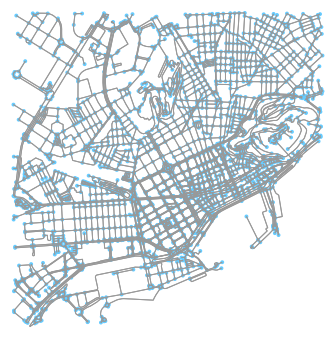

In [19]:
#####Plot the network

G = ox.graph_from_point(point, distance=dist, network_type=networkType)
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0, show=False, close=False)
fig, ax = ox.plot_graph(G, show=False, close=False) #We’ll just take advantage of the show and close parameters in OSMnx to prevent it from finishing the Matplotlib operation and instead returning the unclosed fix and ax objects.

## Retrieve the latitude and longitude of the nodes and convert them into gdf

In [7]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_nodes
#####Alternatively, you can use OSMnx to dump your nodes to a geopandas GeoDataFrame and work with it pandas-style:

#####List the columns of attributes
node_attributes = ox.graph_to_gdfs(G, nodes=False).columns
edge_attributes = ox.graph_to_gdfs(G, nodes=False).columns
list(edge_attributes)

#####retrieve the lat-long coordinates of a set of OSM node IDs in some graph : https://stackoverflow.com/questions/44839297/how-can-i-get-lon-lat-coordinates-from-node-idosmnx
gdf_nodes[['x', 'y']]
gdf_edges[['u','v']]

###### Get the values
G.get_edge_data(u, v).values()
ox.get_route_edge_attributes(G1, (4524113938,4519821175))
gdf_edges['width']

##### Save output to Excel
# writer = pd.ExcelWriter('D:/Thesis/1500m/nodes_coord.xlsx', engine='xlsxwriter')
# gdf_nodes.to_excel(writer, sheet_name='Sheet1')
# writer.save()

y         x       osmid highway  \
4524113920  38.341836 -0.493223  4524113920     NaN   
4524113923  38.341904 -0.494084  4524113923     NaN   
253755397   38.347963 -0.502265   253755397     NaN   
1678426120  38.340280 -0.491538  1678426120     NaN   
253755403   38.347241 -0.501395   253755403     NaN   
...               ...       ...         ...     ...   
4524113914  38.341535 -0.493880  4524113914     NaN   
4524113915  38.341915 -0.493987  4524113915     NaN   
4524113917  38.342142 -0.494014  4524113917     NaN   
4524113918  38.342320 -0.493590  4524113918     NaN   
4524113919  38.342301 -0.493549  4524113919     NaN   

                                 geometry  
4524113920  POINT (-0.4932229 38.3418355)  
4524113923  POINT (-0.4940835 38.3419042)  
253755397   POINT (-0.5022653 38.3479627)  
1678426120  POINT (-0.4915376 38.3402805)  
253755403   POINT (-0.5013954 38.3472413)  
...                                   ...  
4524113914  POINT (-0.4938804 38.3415347)  
4524113915  POINT (-0.4939866 38.3419155)  
4524113917  POINT (-0.4940143 38.3421419)  
4524113918  POINT (-0.4935903 38.3423202)  
4524113919  POINT (-0.4935494 38.3423008)  

[3375 rows x 5 columns]

## Save output to Excel file

In [ ]:
#####Save output to Excel file

#####1. Save file as data frame
df_G = pd.DataFrame.from_dict(gdf_nodes)
#####2. Indicate the location of the file
writer = pd.ExcelWriter('D:/Thesis/plaza1_Luceros/placementEffect/walk, bike, drive/center point moves to north/node_latlon/luceros_n200m_walk_1500m2_latlon.xlsx', engine='xlsxwriter')
df_G_walk.to_excel(writer, sheet_name='Sheet1', startcol=0, startrow=0,header = True, index = True )
writer.save()

## Fine nearest node ID (choose "method"= 'euclidean' or 'haversine')

In [9]:
#####Fine nearest node ID (choose "method"= 'euclidean' or 'haversine')

nearest_id = ox.get_nearest_node(G, point, method='euclidean', return_dist=True)
nearest_id

(940123663, 0.00012136483221649086)

## Select networks type 

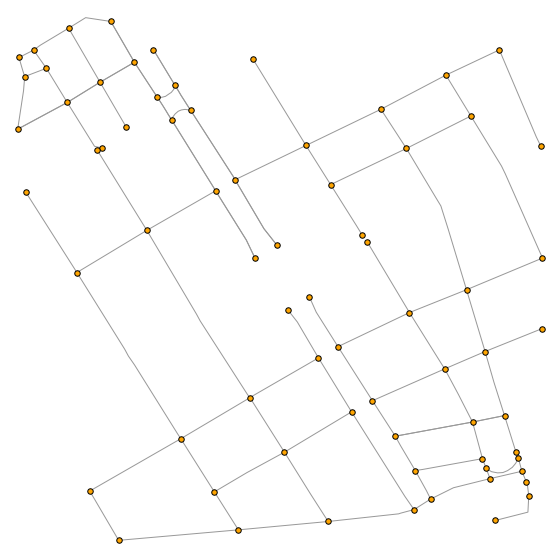

In [8]:
##### 1. Select infrastructure='way["highway"~"footway|birdleway|steps|corridor|path"]' to get a street network and plot it with all edge intersections

G_network_infrustructure = ox.graph_from_point(point, distance=dist, 
                                            infrastructure='way["highway"~"residential|tertiary"]')
#                                           network_type=networkType)
#                                           infrastructure='way["highway"~"residential|footway|steps|living_street|pedestrian|birdleway|corridor|path|sidewalk|road"]')
#                                           infrastructure='way["sidewalk"~"both|left|right|no"]')
G_proj_ifr = ox.project_graph(G_network_infrustructure)
fig, ax = ox.plot_graph(G_proj_ifr, fig_height=10, node_color='orange', node_size=30, node_zorder=2, node_edgecolor='k')

In [ ]:
#####2. save to excel file

G_proj_nodes = G_proj.nodes
writer = pd.ExcelWriter('D:/Thesis/1500m/nodes_G_proj.xlsx', engine='xlsxwriter')
df_G_proj_nodes= pd.DataFrame.from_dict(G_proj_nodes) 
df_G_proj_nodes.to_excel(writer, sheet_name='Sheet1')
writer.save()

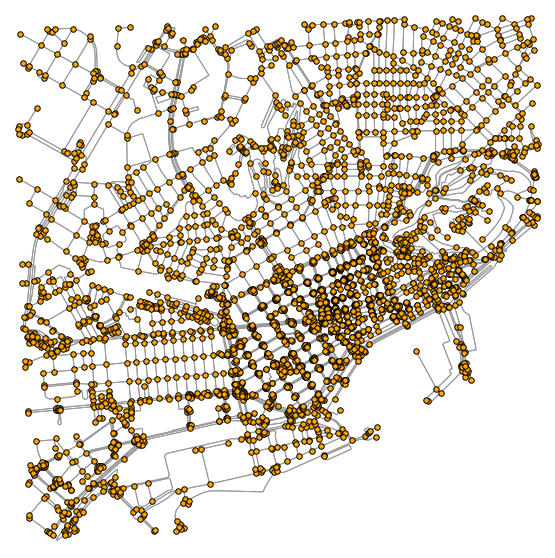

In [15]:
##### Use network_type = "walk" to get a street network and plot it with nodes

G = ox.graph_from_point(point, distance = dist, 
                        network_type = networkType)                         
G_proj = ox.project_graph(G)
fig, ax = ox.plot_graph(G_proj, fig_height=10, node_color='orange', node_size=30, 
                        node_zorder=2, node_edgecolor='k')
G_proj

## clean_intersection

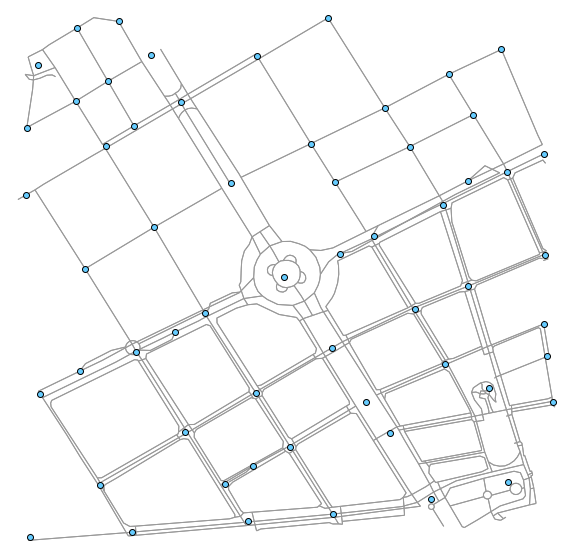

58

In [5]:
##### Use network_type = "walk" to get a street network and plot it with all edge intersections

G = ox.graph_from_point(point, distance = dist, 
                        network_type = networkType)                         
G_proj = ox.project_graph(G)

##### Clean up the intersections and extract their xy coords
intersections = ox.clean_intersections(G_proj, tolerance=15, dead_ends=False)
intersectionPoints = np.array([point.xy for point in intersections])
#clean_intersection_points = ox.clean_intersections(G_proj, tolerance=15, dead_ends=False )
#clean_intersection_count = len(clean_intersection_points)

##### plot the cleaned-up intersections (Adding a point to the plot () #https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.scatter.html)
fig, ax = ox.plot_graph(G_proj, fig_height=10, show=False, close=False, node_alpha=0)
ax.scatter(x=intersectionPoints[:,0], y=intersectionPoints[:,1], zorder=2, color='#66ccff', edgecolors='k')
plt.show()

n = len(intersectionPoints)
m = len(list(G_proj.edges()))
n

#####Save intersections to Excel
# writer = pd.ExcelWriter('D:/Thesis/1500m/intersections.xlsx', engine='xlsxwriter')
# df_intersections = pd.DataFrame(intersectionPoints) 
# df_intersections.to_excel(writer, sheet_name='Sheet1')
# writer.save()

## Weighting / coloring edges by attributes

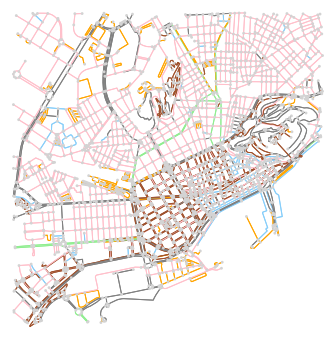

In [23]:
ec = [     'sienna'           if data['highway']=='footway'               
      else 'pink'             if data['highway']=='residential' 
      else 'orange'           if data['highway']=='service' 
      else 'lightgreen'       if data['highway']=='secondary'
      else 'lightskyblue'    if data['highway']=='pedestrian'
      else 'red'              if data['highway']=='cycleway' 
      else 'paleturquoise'    if data['highway']=='living street' 
      else 'grey'             for u, v, key, data in G.edges(keys=True, data=True)] #https://stackoverflow.com/questions/56234047/osmnx-plot-a-network-on-an-interactive-web-map-with-different-colours-per-infra

fig, ax = ox.plot_graph(G, 
                        node_color='lightgrey', 
                        #node_edgecolor='k', 
                        node_size=8, 
                        node_zorder=6, 
                        edge_color=ec, edge_linewidth=1)

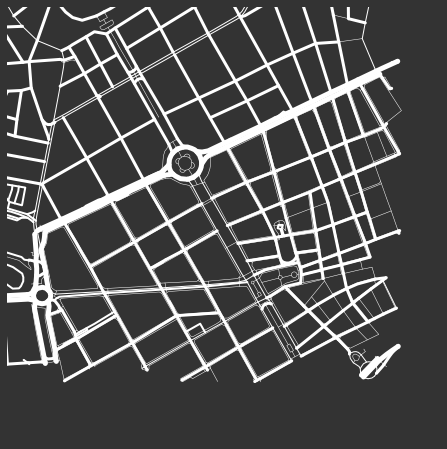

In [66]:
#####Configure street width pixels   https://github.com/gboeing/osmnx-examples/blob/master/notebooks/09-example-figure-ground.ipynb
from IPython.display import Image
ox.config(log_console=True, use_cache=True)
ox.__version__

dpi = 40
point = (38.3459813, -0.49069405)
place = 'portland'
dist = 500

street_widths = {'footway' : 0.5,
                 'steps' : 0.5,
                 'pedestrian' : 0.5,
                 'path' : 0.5,
                 'track' : 0.5,
                 'service' : 2,
                 'residential' : 3,
                 'primary' : 5,
                 'motorway' : 6}

G = ox.graph_from_point(point, distance=dist, 
#                         network_type='all'
                        network_type='walk'
#                       infrastructure='way["highway"~"footway|birdleway|steps|corridor|path"]'
                        )
fig, ax = ox.plot_figure_ground(G=G, 
                                point=point, dist=dist, #這一行控制整個圖面的大小
#                                 network_type='all',
                                default_width=1, 
                                street_widths = street_widths,
                                dpi=dpi,
                                save=False, show=True, close=True,
                                filename=place)

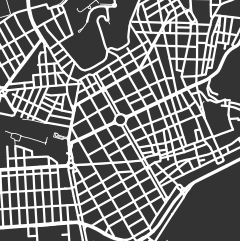

In [83]:
#####Configure street width pixels   https://github.com/gboeing/osmnx-examples/blob/master/notebooks/09-example-figure-ground.ipynb
img_folder = 'images'
extension = 'png'
size = 240
place = 'sf'
point = (38.3459813, -0.49069405)
fig, ax = ox.plot_figure_ground(point=point, filename=place, dpi=dpi)
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

# Weighting/coloring nodes and intersections by attributes

### 1. Layer 1 (G1): Load network multigraph and node/edges

In [24]:
point = (38.3459813, -0.49069405)
dist = 500
networkType = 'walk'

#####Get north, south, east, west 
bbox = ox.bbox_from_point(point, distance=dist)
north, south, east, west = bbox
north, south, east, west

#####Create network graph 1, "G", with osmnx
bbox = [north, south, east, west]
G1 = ox.graph_from_bbox(north, south, east, west, network_type= networkType)

In [25]:
##### bbox = [north, south, east, west]

#####Retrieve NODES using Pandana : lat_min(south = bbox[1]), lng_min (west = bbox[3]), lat_max (north = bbox[0]), lng_max (east = bbox[2])
G2 = osm.pdna_network_from_bbox (south, west, north, east)#(bbox[1], bbox[3], bbox[0], bbox[2])

Requesting network data within bounding box from Overpass API in 1 request(s)
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](38.34147945,-0.49641049,38.35048315,-0.48497765);>;);out;'}"
Downloaded 445.5KB from www.overpass-api.de in 1.81 seconds
Downloaded OSM network data within bounding box from Overpass API in 1 request(s) and 1.83 seconds
Returning OSM data with 2,736 nodes and 719 ways...
Edge node pairs completed. Took 3.20 seconds
Returning processed graph with 1,183 nodes and 1,934 edges...
Completed OSM data download and Pandana node and edge table creation in 5.24 seconds


### 2. Layer 2 (G2) : Load POIS using osm.node_query

In [26]:
tag_highway = ['bus_stop']
tag_amenity = ['bicycle_parking', 'motorcycle_parking', 'parking']
tags = tag_highway + tag_amenity
#print(tags)

tag_list = []
for i in range (0, len(tag_highway)):
    tag_list.append('"highway"="%s"'%tag_highway[i])
    for j in range (0, len(tag_amenity)):
        tag_list.append('"amenity"= "%s"'%tag_amenity[j])
#print(tag_list)

#Each tag 
pois2_lon = []
pois2_lat = []
for i in range (0,len(tag_list)):
    names = locals()
    names['pois2_{}'.format(tags[i])] = osm.node_query(south, west, north, east, tags='{}'.format(tag_list[i])) #each tag has own var name and data set
    names['pois2_{}_lon'.format(tags[i])] = list(names['pois2_{}'.format(tags[i])]['lon']) #each tag has own var name and lon list
    names['pois2_{}_lat'.format(tags[i])] = list(names['pois2_{}'.format(tags[i])]['lat']) #each tag has own var name and lat list
pois2_bus_stop

#Put all the lon & lat together
for i in range (0, len(tags)):
    pois2_lon += names['pois2_{}_lon'.format(tags[i])]  #all lon
    pois2_lat += names['pois2_{}_lat'.format(tags[i])]  #all lat
pois2_lon

[-0.4894008,
 -0.4891433,
 -0.4899516,
 -0.4898973,
 -0.4922111,
 -0.490161,
 -0.4905966,
 -0.4869425,
 -0.4866852,
 -0.4859485,
 -0.4852132,
 -0.4899084,
 -0.4872058,
 -0.4962848,
 -0.4857024,
 -0.4917124,
 -0.4901128,
 -0.4933343,
 -0.4937832,
 -0.4963225,
 -0.4954536,
 -0.486665,
 -0.4889688,
 -0.4921051,
 -0.4943723,
 -0.4953662,
 -0.4943077,
 -0.4939406,
 -0.4945425,
 -0.4956393,
 -0.4963862,
 -0.4908627,
 -0.4853243,
 -0.4920261,
 -0.4946805,
 -0.4901633,
 -0.4894419,
 -0.4935738,
 -0.4894101,
 -0.4870733,
 -0.4945662,
 -0.4862453,
 -0.49474,
 -0.4889573,
 -0.4943714,
 -0.4889144,
 -0.488791,
 -0.4917307,
 -0.4916234,
 -0.4933776,
 -0.4932207,
 -0.4946382,
 -0.4942566,
 -0.4852029,
 -0.4898677,
 -0.494356,
 -0.4945043,
 -0.4908735,
 -0.4922988,
 -0.4850866,
 -0.4882847,
 -0.4893853,
 -0.490619,
 -0.4906957,
 -0.4899223,
 -0.4889374,
 -0.4961262,
 -0.4945314,
 -0.4955081,
 -0.495546,
 -0.4869861,
 -0.4859158,
 -0.4956962,
 -0.4941666,
 -0.4903861,
 -0.4875612,
 -0.4941301,
 -0.487

In [27]:
#put all the pois2 data together
pois2 = names['pois2_{}'.format(tags[0])]

for i in range(0,len(tags)):
        if i > 0 :
               pois2 = pois2.append(names['pois2_{}'.format(tags[i])]) 
pois2['lon']
pois2

C:\Anaconda\envs\ox\lib\site-packages\pandas\core\frame.py:7116: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


access  amenity bench  bus capacity covered  fee   highway  \
id                                                                      
1506250807    NaN      NaN   NaN  yes      NaN     NaN  NaN  bus_stop   
1506250811    NaN      NaN   NaN  yes      NaN     NaN  NaN  bus_stop   
1506250826    NaN      NaN   NaN  yes      NaN     NaN  NaN  bus_stop   
1506250830    NaN      NaN   NaN  yes      NaN     NaN  NaN  bus_stop   
1506250843    NaN      NaN   NaN  yes      NaN     NaN  NaN  bus_stop   
...           ...      ...   ...  ...      ...     ...  ...       ...   
1240662481    NaN  parking   NaN  NaN      NaN     NaN  NaN       NaN   
1674389913    NaN  parking   NaN  NaN      NaN     NaN  NaN       NaN   
1678426087    yes  parking   NaN  NaN      NaN     NaN  yes       NaN   
6633334259    yes  parking   NaN  NaN      NaN     NaN  yes       NaN   
6877656828    NaN  parking   NaN  NaN      NaN     NaN  NaN       NaN   

                  lat       lon                              name operator  \
id                                                                           
1506250807  38.343950 -0.489401                  Federico Soto, 1    Subus   
1506250811  38.344188 -0.489143                  Federico Soto, 6      NaN   
1506250826  38.341918 -0.489952       Pintor Lorenzo Casanova, 22    Subus   
1506250830  38.342588 -0.489897               Reyes Católicos, 17    Subus   
1506250843  38.341557 -0.492211               Reyes Católicos, 47    Subus   
...               ...       ...                               ...      ...   
1240662481  38.346219 -0.489833  Entrada Parking Alfonso el Sabio      NaN   
1674389913  38.344389 -0.490333         Parking - El Corte Inglés      NaN   
1678426087  38.342602 -0.493263                   El Corte Inglés      NaN   
6633334259  38.342321 -0.493747                 Parking Maisonave      NaN   
6877656828  38.342765 -0.487731                               NaN      NaN   

                parking public_transport   ref shelter source:date wheelchair  
id                                                                             
1506250807          NaN         platform  3939     NaN         NaN        NaN  
1506250811          NaN         platform  2603     NaN         NaN        NaN  
1506250826          NaN         platform  3940     NaN         NaN        NaN  
1506250830          NaN         platform  4447     NaN         NaN        NaN  
1506250843          NaN         platform  4449     NaN         NaN        NaN  
...                 ...              ...   ...     ...         ...        ...  
1240662481          NaN              NaN   NaN     NaN         NaN        NaN  
1674389913          NaN              NaN   NaN     NaN         NaN        NaN  
1678426087  underground              NaN   NaN     NaN         NaN        NaN  
6633334259  underground              NaN   NaN     NaN         NaN        NaN  
6877656828          NaN              NaN   NaN     NaN         NaN        NaN  

[85 rows x 18 columns]

In [271]:
writer = pd.ExcelWriter('D:/Thesis/1500m/pois2.xlsx', engine='xlsxwriter')
pois2.to_excel(writer, sheet_name='Sheet1')
writer.save()

### 3. Plot layer 1 & 2

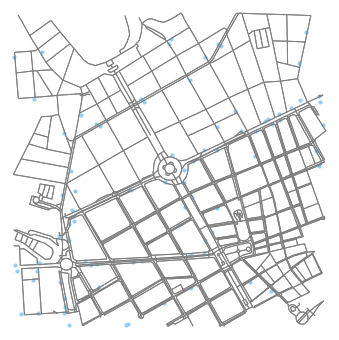

In [28]:
#####Layer 1: Plot network = G1 
fig, ax = ox.plot_graph(G1, fig_height=6, 
#fig, ax = ox.plot_graph(G1, fig_height=10, 
                        node_color='grey', node_size=20, node_zorder=2,  
                         node_alpha=0,                    ####會使node隱形
                        show=False, close=False,   #####prevent Matplotlib
                        edge_color = 'grey')
                        #edge_color='#777777')
                        #edge_color='#dddddd')

#####Layer 2: Plot POIs : Retrieve the list of lon and lat from dataframe "pois2"
x_pois = list(pois2['lon'])
y_pois = list(pois2['lat'])
ax.scatter(x_pois, y_pois, c = 'lightskyblue', s = 10, alpha=0.9)

plt.show()

### 4. Get INTERSECTION using OSMnx

In [32]:
##### 1. project the graph (G1) to meters to clean the intersections with a sensible tolerance parameter.
G_proj = ox.project_graph(G1)  

##### 2. Create a GeoDataFrame (list  POINT) called intersection
intersections = ox.clean_intersections(G_proj, tolerance=15, dead_ends=False)       
list(intersections)
dir(intersections)
len(intersections)
intersections # Return GeoDataFrame: POINT (719196.2439653946 4247140.633384085)

0        POINT (717957.5844034613 4245659.96915119)
1       POINT (717833.8439310142 4245761.304953192)
2       POINT (718088.7839697457 4245736.541793761)
3        POINT (718696.8106652739 4245700.88641574)
4        POINT (718551.9080633671 4245679.33126297)
                           ...                     
1022    POINT (720119.0454380064 4247149.482927805)
1023    POINT (717960.4850530026 4247154.295933075)
1024    POINT (719741.6990114561 4247154.426122268)
1025     POINT (720325.783942463 4247180.686031214)
1026    POINT (719285.3874947219 4247182.905183224)
Length: 1027, dtype: object

In [33]:
##### 4.2 plot the cleaned-up intersections with (lat, lon) = spherical lat-long geometries
#project the GeoDataframe of (cleaned intersection) centroids back to lat-long : https://stackoverflow.com/questions/50913798/osmnx-get-lat-lon-coordinates-of-clean-intersection-nodes
gdf_intersections2 = gpd.GeoDataFrame(geometry = intersections)
gdf_intersections2.crs = G_proj.graph['crs']
test = ox.project_gdf(gdf_intersections2, to_latlong=True)

#"geometry"--> POINT --> (lat, lon): Get Lat Lon Coordinates of Clean Intersection Nodes
####Firstly, convert PROJECT/Shapely geometries into GeoDataFrame 
#https://gis.stackexchange.com/questions/174159/convert-a-pandas-dataframe-to-a-geodataframe
gdf_intersections2 = gpd.GeoDataFrame(test, columns=['geometry'], crs=G1.graph['crs'])  
intersection_lon = gdf_intersections2['geometry'].map(lambda pt: pt.coords[0][0])
intersection_lat = gdf_intersections2['geometry'].map(lambda pt: pt.coords[0][1])
intersection_lon_list = list(intersection_lon)
intersection_lat_list = list(intersection_lat)
interesection_coord = (intersection_lat, intersection_lon)   #Return: values
print(interesection_coord)

(0       38.332586
1       38.333529
2       38.333244
3       38.332775
4       38.332616
          ...    
1022    38.345469
1023    38.346040
1024    38.345606
1025    38.345699
1026    38.345974
Name: geometry, Length: 1027, dtype: float64, 0      -0.506370
1      -0.507754
2      -0.504847
3      -0.497908
4      -0.499571
          ...   
1022   -0.481199
1023   -0.505876
1024   -0.485511
1025   -0.478825
1026   -0.490719
Name: geometry, Length: 1027, dtype: float64)


In [278]:
writer = pd.ExcelWriter('D:/Thesis/1500m/interesection_coord.xlsx', engine='xlsxwriter')
gdf_intersections2.to_excel(writer, sheet_name='Sheet1')
writer.save()

### 5. Get NODE id near POIs 

In [149]:
#####Retrieve node id in G2 near intersection 
node_near_pois2 = G2.get_node_ids(pois2_lon, pois2_lat, mapping_distance=1) 
node_near_pois2[0]
node_near_pois2
#dw: AttributeError: 'MultiDiGraph' object has no attribute 'get_node_ids'

0       253770798
1      1227826603
2      6632180249
3       253094683
4       234758921
          ...    
288     241784512
289    3740394382
290    6633334259
291    4529345973
292    4550005828
Name: node_id, Length: 293, dtype: int64

### 6. Get NODE id near intersection using pandana

In [35]:
####1. Get node_id near to POIs using (x, y) of pois in G1  -------->Doesnt'work
node_near_intersections = G2.get_node_ids(intersection_lon_list, intersection_lat_list, mapping_distance=1) 
node_near_intersections

0       6874458730
1       2545497376
2       6874459100
3       2299335995
4        376369182
           ...    
1022     376341616
1023     253137815
1024     241862393
1025    4529333002
1026     940123713
Name: node_id, Length: 1027, dtype: int64

### 7. Add new column/attribute ("near_ids_list2" =node id near pois) to data frame pois1 and pois2 using  pandana

In [36]:
#####1.要轉換成list type才能把data 放到new column : https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/
node_near_ids_list2 = list(node_near_pois2) 
node_near_ids_list2

##### 2. Add new column / attribute(?) to the data frame using pandana

pois2['node_near_pois_list2'] = node_near_ids_list2 ###可以加到pois2 (pois using pandana)
pois2

#####ValueError: Length of values does not match length of index
#pois1['nearest_pois_list2'] = node_near_ids_list2
#list(pois1)                          ##Access the index ofthe dataframe
#pois1

access addr:city addr:housenumber addr:postcode  \
id                                                                
662950782          NaN       NaN              NaN           NaN   
662950788          NaN       NaN              NaN           NaN   
1502714919         NaN       NaN              NaN           NaN   
1506250770         NaN       NaN              NaN           NaN   
1506250781         NaN       NaN              NaN           NaN   
...                ...       ...              ...           ...   
3415704759  designated       NaN              NaN           NaN   
4426732736         NaN       NaN              NaN           NaN   
6633334259         yes       NaN              NaN           NaN   
6755662812         yes   Alacant                6         03003   
6877656828         NaN       NaN              NaN           NaN   

                  addr:street  amenity bench bicycle_parking  bin  bus  ...  \
id                                                                      ...   
662950782                 NaN      NaN   yes             NaN  NaN  yes  ...   
662950788                 NaN      NaN    no             NaN  NaN  yes  ...   
1502714919                NaN      NaN   NaN             NaN  NaN  yes  ...   
1506250770                NaN      NaN   NaN             NaN  NaN  yes  ...   
1506250781                NaN      NaN   NaN             NaN  NaN  yes  ...   
...                       ...      ...   ...             ...  ...  ...  ...   
3415704759                NaN  parking   NaN             NaN  NaN  NaN  ...   
4426732736                NaN  parking   NaN             NaN  NaN  NaN  ...   
6633334259                NaN  parking   NaN             NaN  NaN  NaN  ...   
6755662812  avenida de Loring  parking   NaN             NaN  NaN  NaN  ...   
6877656828                NaN  parking   NaN             NaN  NaN  NaN  ...   

           payment:google_pay payment:mastercard payment:visa  \
id                                                              
662950782                 NaN                NaN          NaN   
662950788                 NaN                NaN          NaN   
1502714919                NaN                NaN          NaN   
1506250770                NaN                NaN          NaN   
1506250781                NaN                NaN          NaN   
...                       ...                ...          ...   
3415704759                NaN                NaN          NaN   
4426732736                NaN                NaN          NaN   
6633334259                NaN                NaN          NaN   
6755662812                yes                yes          yes   
6877656828                NaN                NaN          NaN   

           public_transport   ref shelter source:date  tactile_paving  \
id                                                                      
662950782          platform  4320     yes         NaN              no   
662950788          platform  4326      no         NaN              no   
1502714919         platform  3961     NaN         NaN             NaN   
1506250770         platform  3911     NaN         NaN             NaN   
1506250781         platform  3944     NaN         NaN             NaN   
...                     ...   ...     ...         ...             ...   
3415704759              NaN   NaN     NaN         NaN             NaN   
4426732736              NaN   NaN     NaN         NaN             NaN   
6633334259              NaN   NaN     NaN         NaN             NaN   
6755662812              NaN   NaN     NaN         NaN             NaN   
6877656828              NaN   NaN     NaN         NaN             NaN   

           wheelchair node_near_pois_list2  
id                                          
662950782         NaN            253770798  
662950788         NaN           1227826603  
1502714919        NaN           6632180249  
1506250770        NaN            253094683  
1506250781        NaN            234758921  
...  

### 8. Add new column / attribute ("node_near_intersections") to the data of "gdf_intersection2" using OSMnx

In [37]:
node_near_intersections_list = list(node_near_intersections) 
node_near_intersections_list
gdf_intersections2['node_near_intersections'] = node_near_intersections
gdf_intersections2 #This is a Geodataframe

geometry  node_near_intersections
0     POINT (-0.5063704583081033 38.33258630342446)               6874458730
1     POINT (-0.5077536499945658 38.33352880000037)               2545497376
2      POINT (-0.5048470771209864 38.3332438325975)               6874459100
3     POINT (-0.4979078183016116 38.33277462976166)               2299335995
4     POINT (-0.4995708500118914 38.33261590000536)                376369182
...                                             ...                      ...
1022  POINT (-0.4811988000000005 38.34546909999998)                376341616
1023  POINT (-0.5058757598777504 38.34604024780509)                253137815
1024  POINT (-0.4855113499964324 38.34560625000044)                241862393
1025  POINT (-0.4788254834496756 38.34569921694298)               4529333002
1026  POINT (-0.4907194013623538 38.34597448547014)                940123713

[1027 rows x 2 columns]

### 9. Data 4 : merge dataframes of  pois and node => create a new data frame

In [38]:
#####https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
#####無法用OSMnx 去add a new column 所以只能用merge data
G1_n_pois2  = pd.merge(pois2,                  #data frame 1
               gdf_nodes,                   #data frame 2
               left_on='node_near_pois_list2', #column in data frame 1
               right_on='osmid',         #column in data frame 2
               how='right',              #以右邊為主
               sort=False,
               suffixes=['_from', '_to'])
G1_n_pois2 
#G1_n_pois2 ['x']

G1_n_pois2_n_intersection = pd.merge(gdf_intersections2,                  #data frame 1
               G1_n_pois2,                   #data frame 2
               left_on='node_near_intersections', #column in data frame 1
               right_on='osmid',         #column in data frame 2
               how='right',              #以右邊為主
               sort=False,
               suffixes=['_from', '_to'])
G1_n_pois2_n_intersection
# len(G1_n_pois2_n_intersection)

geometry_from  node_near_intersections  \
0     POINT (-0.5063704583081033 38.33258630342446)             6.874459e+09   
1     POINT (-0.5077536499945658 38.33352880000037)             2.545497e+09   
2      POINT (-0.5048470771209864 38.3332438325975)             6.874459e+09   
3     POINT (-0.4979078183016116 38.33277462976166)             2.299336e+09   
4     POINT (-0.4995708500118914 38.33261590000536)             3.763692e+08   
...                                             ...                      ...   
3392                                            NaN                      NaN   
3393                                            NaN                      NaN   
3394                                            NaN                      NaN   
3395                                            NaN                      NaN   
3396                                            NaN                      NaN   

     access addr:city addr:housenumber addr:postcode addr:street amenity  \
0       NaN       NaN              NaN           NaN         NaN     NaN   
1       NaN       NaN              NaN           NaN         NaN     NaN   
2       NaN       NaN              NaN           NaN         NaN     NaN   
3       NaN       NaN              NaN           NaN         NaN     NaN   
4       NaN       NaN              NaN           NaN         NaN     NaN   
...     ...       ...              ...           ...         ...     ...   
3392    NaN       NaN              NaN           NaN         NaN     NaN   
3393    NaN       NaN              NaN           NaN         NaN     NaN   
3394    NaN       NaN              NaN           NaN         NaN     NaN   
3395    NaN       NaN              NaN           NaN         NaN     NaN   
3396    NaN       NaN              NaN           NaN         NaN     NaN   

     bench bicycle_parking  ... shelter source:date tactile_paving wheelchair  \
0      NaN             NaN  ...     NaN         NaN            NaN        NaN   
1      NaN             NaN  ...     NaN         NaN            NaN        NaN   
2      NaN             NaN  ...     NaN         NaN            NaN        NaN   
3      NaN             NaN  ...     NaN         NaN            NaN        NaN   
4      NaN             NaN  ...     NaN         NaN            NaN        NaN   
...    ...             ...  ...     ...         ...            ...        ...   
3392   NaN             NaN  ...     NaN         NaN            NaN        NaN   
3393   NaN             NaN  ...     NaN         NaN            NaN        NaN   
3394   NaN             NaN  ...     NaN         NaN            NaN        NaN   
3395   NaN             NaN  ...     NaN         NaN            NaN        NaN   
3396   NaN             NaN  ...     NaN         NaN            NaN        NaN   

     node_near_pois_list2          y         x       osmid highway_to  \
0                     NaN  38.332606 -0.506414  6874458730        NaN   
1                     NaN  38.333459 -0.507746  2545497376        NaN   
2                     NaN  38.333282 -0.504890  6874459100        NaN   
3                     NaN  38.332765 -0.497914  2299335995        NaN   
4                     NaN  38.332590 -0.499605   376369182        NaN   
...                   ...        ...       ...         ...        ...   
3392                  NaN  38.341535 -0.493880  4524113914        NaN   
3393                  NaN  38.341915 -0.493987  4524113915        NaN   
3394                  NaN  38.342142 -0.494014  4524113917        NaN   
3395                  NaN  38.342320 -0.493590  4524113918        NaN   
3396                  NaN  38.342301 -0.493549  4524113919        NaN   

                        geometry_to  
0      POINT (-0.5064138 38.332606)  
1     POINT (-0.5077461 38.3334589)  
2     POINT (-0.5048903 38.3332819)  
3     POINT (-0.4979145 38.3327654)  
4     POINT (-0.4996048 38.3325904)  
...                             ...  
3392  POINT (-0.4938804 38.3415347)  
3393  POIN

In [41]:
pois2_n_interestions  = pd.merge(pois2,                  #data frame 1
               gdf_intersections2,                   #data frame 2
               left_on='node_near_pois_list2', #column in data frame 1
               right_on='node_near_intersections',         #column in data frame 2
               how='right',              #以右邊為主
               sort=False,
               suffixes=['_from', '_to'])
pois2_n_interestions  

access addr:city addr:housenumber addr:postcode addr:street amenity  \
0       NaN       NaN              NaN           NaN         NaN     NaN   
1       NaN       NaN              NaN           NaN         NaN     NaN   
2       NaN       NaN              NaN           NaN         NaN     NaN   
3       NaN       NaN              NaN           NaN         NaN     NaN   
4       NaN       NaN              NaN           NaN         NaN     NaN   
...     ...       ...              ...           ...         ...     ...   
1032    NaN       NaN              NaN           NaN         NaN     NaN   
1033    NaN       NaN              NaN           NaN         NaN     NaN   
1034    NaN       NaN              NaN           NaN         NaN     NaN   
1035    NaN       NaN              NaN           NaN         NaN     NaN   
1036    NaN       NaN              NaN           NaN         NaN     NaN   

     bench bicycle_parking  bin  bus  ... payment:visa public_transport   ref  \
0      yes             NaN  NaN  yes  ...          NaN         platform  4320   
1      NaN             NaN  NaN  yes  ...          NaN         platform  4304   
2      NaN             NaN  NaN  yes  ...          NaN         platform  3961   
3      NaN             NaN  NaN  yes  ...          NaN         platform  3912   
4      NaN             NaN  NaN  yes  ...          NaN         platform  3943   
...    ...             ...  ...  ...  ...          ...              ...   ...   
1032   NaN             NaN  NaN  NaN  ...          NaN              NaN   NaN   
1033   NaN             NaN  NaN  NaN  ...          NaN              NaN   NaN   
1034   NaN             NaN  NaN  NaN  ...          NaN              NaN   NaN   
1035   NaN             NaN  NaN  NaN  ...          NaN              NaN   NaN   
1036   NaN             NaN  NaN  NaN  ...          NaN              NaN   NaN   

     shelter source:date tactile_paving wheelchair  node_near_pois_list2  \
0        yes         NaN             no        NaN          2.537708e+08   
1        NaN         NaN            NaN        NaN          2.537708e+08   
2        NaN         NaN            NaN        NaN          6.632180e+09   
3        NaN         NaN            NaN        NaN          2.567888e+09   
4        NaN         NaN            NaN        NaN          2.485471e+08   
...      ...         ...            ...        ...                   ...   
1032     NaN         NaN            NaN        NaN                   NaN   
1033     NaN         NaN            NaN        NaN                   NaN   
1034     NaN         NaN            NaN        NaN                   NaN   
1035     NaN         NaN            NaN        NaN                   NaN   
1036     NaN         NaN            NaN        NaN                   NaN   

                                           geometry node_near_intersections  
0            POINT (-0.4972745000000038 38.3503151)               253770798  
1            POINT (-0.4972745000000038 38.3503151)               253770798  
2     POINT (-0.5076867999999993 38.33533779999998)              6632180249  
3     POINT (-0.4983699999961451 38.33962025000024)              2567888477  
4     POINT (-0.4990225000000004 38.33962319999998)               248547143  
...                                             ...                     ...  
1032  POINT (-0.4811988000000005 38.34546909999998)               376341616  
1033  POINT (-0.5058757598777504 38.34604024780509)               253137815  
1034  POINT (-0.4855113499964324 38.34560625000044)               241862393  
1035  POINT (-0.4788254834496756 38.34569921694298)              4529333002  
1036  POINT (-0.4907194013623538 38.34597448547014)               940123713  

[1037 rows x 42 columns]

In [63]:
##### 4.2 plot the cleaned-up intersections with (lat, lon) = spherical lat-long geometries
#project the GeoDataframe of (cleaned intersection) centroids back to lat-long : https://stackoverflow.com/questions/50913798/osmnx-get-lat-lon-coordinates-of-clean-intersection-nodes
gdf_intersections3 = gpd.GeoDataFrame(geometry = pois2_n_interestions['geometry'])
gdf_intersections3.crs = G_proj.graph['crs']
gdf_intersections4 = ox.project_gdf(gdf_intersections3) # , to_latlong=True)

#"geometry"--> POINT --> (lat, lon): Get Lat Lon Coordinates of Clean Intersection Nodes
gdf_intersections5 = gpd.GeoDataFrame(gdf_intersections4, columns=['geometry'], crs=G1.graph['crs'])  ####Firstly, convert PROJECT into GeoDataFrame 
intersection_lon2 = gdf_intersections5['geometry'].map(lambda pt: pt.coords[0][0])
intersection_lat2 = gdf_intersections5['geometry'].map(lambda pt: pt.coords[0][1])
intersection_lon_list2 = list(intersection_lon2)
intersection_lat_list2 = list(intersection_lat2)
interesection_coord2 = (intersection_lat2, intersection_lon2)   #Return: values
print(intersection_lon2)

0      -0.497275
1      -0.497275
2      -0.507687
3      -0.498370
4      -0.499023
          ...   
1032   -0.481199
1033   -0.505876
1034   -0.485511
1035   -0.478825
1036   -0.490719
Name: geometry, Length: 1037, dtype: float64


In [306]:
writer = pd.ExcelWriter('D:/Thesis/1500m/combined.xlsx', engine='xlsxwriter')
# df_intersections = pd.DataFrame(intersectionPoints) 
G1_n_pois2_n_intersection.to_excel(writer, sheet_name='Sheet1')
writer.save()

### 10 Coloring intersections

In [27]:
select_nodes17 = ['r' if node in node_near_ids_list2 else 'pink' for node in G1.nodes()]   
select_intersections = ['b' if node in node_near_intersections else 'grey' for node in G1.nodes()]

select_intersections2 = [ 'b' if item in pois2_n_interestions['ref'] == 4320 else 'r'  for item in pois2_n_interestions['ref']]
select_intersections2

['r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r'

In [28]:
ec = [     'skyblue'       if data['highway']=='footway'               
      else 'skyblue'       if data['highway']=='residential' 
      #else 'lightgreen'   if data['highway']=='cycleway' 
      #else 'sienna'        if data['highway']=='service' 
      #else 'paleturquoise'    if data['highway']=='living street' 
      else 'grey'          if data['highway']=='secondary'
      #else 'lightskyblue'  if data['highway']=='pedestrian'
      else 'black'         for u, v, key, data in G.edges(keys=True, data=True)] #https://stackoverflow.com/questions/56234047/osmnx-plot-a-network-on-an-interactive-web-map-with-different-colours-per-infra

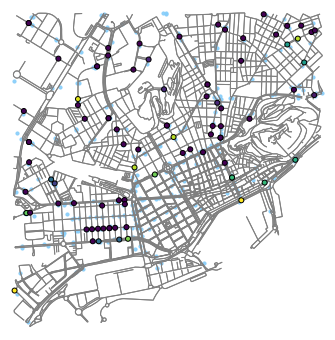

In [64]:
#####Layer 1: Plot network = G1 
fig, ax = ox.plot_graph(G1, fig_height=6, 
#fig, ax = ox.plot_graph(G1, fig_height=10, 
                        node_color=select_intersections, node_size=20, node_zorder=2,  
                         node_alpha=0,                    ####會使node隱形
                        show=False, close=False,   #####prevent Matplotlib
                        edge_color = 'grey')
                        #edge_color='#777777')
                        #edge_color='#dddddd')

#####Layer 2: Plot POIs : Retrieve the list of lon and lat from dataframe "pois2"
x_pois = list(pois2['lon'])
y_pois = list(pois2['lat'])
ax.scatter(x_pois, y_pois, c = 'lightskyblue', s = 10, alpha=0.9)

#####Layer 3 : Plot INTERSECTIONS 
#####https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category
ax.scatter(x = intersection_lon_list2, y = intersection_lat_list2, zorder=2, 
               c= pois2_n_interestions['node_near_pois_list2'],
               #color=gdf_intersections2['node_near_intersections'], #ValueError: 'color' kwarg must be an mpl color spec or sequence of color specs. For a sequence of values to be color-mapped, use the 'c' argument instead.
               edgecolors='k', s = 25)


#####Layer 4: Plot nodes near POIs: Retrieve the list of lon and lat from "nearest_to_pois", the x and y of node nearest to pois
x_node_near_pois = list(G1_n_pois2['x']) 
y_node_near_pois = list(G1_n_pois2['y'])
#ax.scatter(x_node_near_pois[0:20], y_node_near_pois[0:20], c='green', zorder = 1, s = 180, alpha=0.3)

plt.show()

# Bearing

### Calculate bearing without defining isochrone

In [108]:
G = ox.add_edge_bearings(G)

#####2.1 Create a "Series" with column name: https://stackoverflow.com/questions/23365466/pandas-series-to-excel
bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)],name='Alicante, Plaza de Los Luceros')
bearings

#####2.2 Create a Pandas dataframe from some data: https://xlsxwriter.readthedocs.io/example_pandas_simple.html
#df = pd.DataFrame({'Data': [10, 20, 30, 20, 15, 30, 45]})
#df = DataFrame(beariings, columns= ['Brand', 'Price'])

#####3. Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('E:/Walkability around bus stops/bearing/bearing.xlsx', engine='xlsxwriter')

#####4. Convert the dataframe to an XlsxWriter Excel object. (https://xlsxwriter.readthedocs.io/example_pandas_positioning.html)
bearings.to_excel(writer, sheet_name='Sheet1')

#####%. Close the Pandas Excel writer and output the Excel file.
writer.save()

Text(0.5, 1.0, 'bearning')

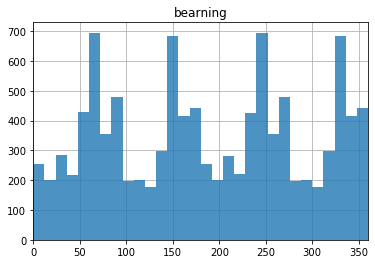

In [109]:
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

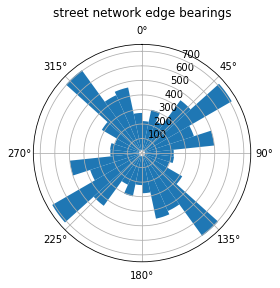

In [110]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]

count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))

division = division[0:-1]
width =  2 * np.pi/n

ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# Select isochrone and color all travel times

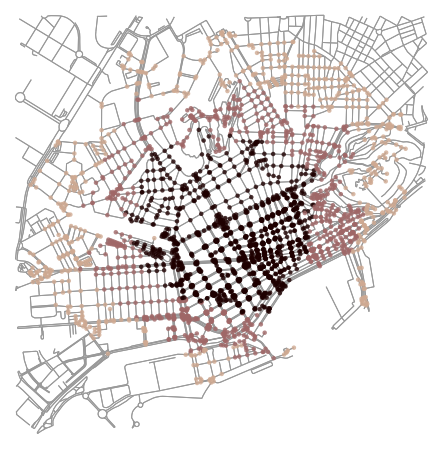

In [107]:
G = ox.graph_from_point((38.3459813, -0.49069405), distance=1500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

#############define 等時圈

center_node = ox.get_nearest_node(G, (38.3459813, -0.49069405))

meters_per_minute = 5 * 1000 / 60 # 每小時10公里
for u, v, k, data in G.edges(data=True, keys=True):
    data['time'] = data['length'] / meters_per_minute
    
trip_times = [10, 15, 20] #分鐘

iso_colors = ox.get_colors(n=len(trip_times), cmap='pink_r', start=0.5, return_hex=True)
node_colors = {}
####Possible values for cmap =Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r,
#Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu,
#PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn,
#RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, 
#YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, 
#cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, 
#gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, 
#gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral,
#nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, 
#summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, 
#twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r

#####color all three travel times : radius value = trip_time
radius_value = trip_times

for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance='time')      ###改變radius的value: trip_time, 10, 15, 20
    for node in subgraph.nodes():
        node_colors[node] = color # 抵達的node給顏色
        
nc = [node_colors[node] if node in node_colors else 'none' for node in G.nodes()]
ns = [20 if node in node_colors else 0 for node in G.nodes()]
fig, ax = ox.plot_graph(G, fig_height=8, node_color=nc, node_size=ns, node_alpha=0.8, node_zorder=2)

## 6.2 Select isochrone and color travel times = ? min

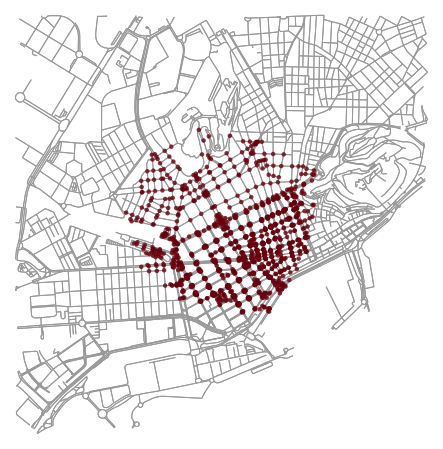

In [71]:
G = ox.graph_from_point((38.3459813, -0.49069405), distance=1500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

#############define 等時圈

center_node = ox.get_nearest_node(G, (38.3459813, -0.49069405))

meters_per_minute = 5 * 1000 / 60 # 每小時10公里
for u, v, k, data in G.edges(data=True, keys=True):
    data['time'] = data['length'] / meters_per_minute
    
trip_times = [10, 15, 20] #分鐘

iso_colors = ox.get_colors(n=len(trip_times), cmap='Reds', start=0.3, return_hex=True)
node_colors = {}

#####color only 10min trip  : radius value = 10
radius_value = 10

for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, center_node, radius=radius_value, distance='time')      ###改變radius的value: trip_time, 10, 15, 20
    for node in subgraph.nodes():
        node_colors[node] = color # 抵達的node給顏色
        
nc = [node_colors[node] if node in node_colors else 'none' for node in G.nodes()]
ns = [20 if node in node_colors else 0 for node in G.nodes()]
fig, ax = ox.plot_graph(G, fig_height=8, node_color=nc, node_size=ns, node_alpha=0.8, node_zorder=2)

# Calculate bearing of defined isochrone

In [163]:
subgraph = nx.ego_graph(G, center_node, radius=radius_value, distance='time')
G = ox.add_edge_bearings(subgraph)
bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)],name='Alicante, Plaza de Los Luceros')
bearings
writer = pd.ExcelWriter('E:/Walkability around bus stops/bearing/bearing.xlsx', engine='xlsxwriter')
bearings.to_excel(writer, sheet_name='Sheet1')
writer.save()

FileCreateError: [Errno 2] No such file or directory: 'E:/Walkability around bus stops/bearing/bearing.xlsx'

Text(0.5, 1.0, 'bearning')

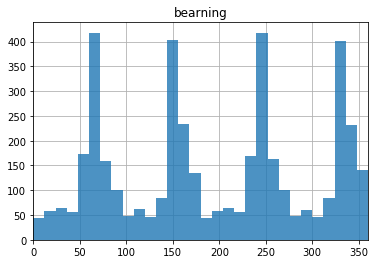

In [164]:
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

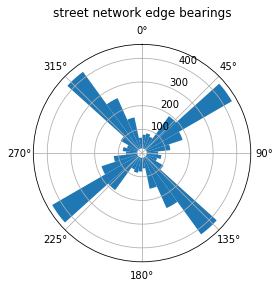

In [165]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]

count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))

division = division[0:-1]
width =  2 * np.pi/n

ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# Centrality

### 1. Degree of centrality

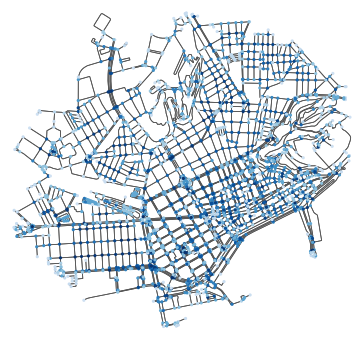

In [68]:
G = ox.graph_from_point(point, distance=dist, network_type='walk')

#############define 等時圈

center_node = ox.get_nearest_node(G, (38.3459813, -0.49069405))

meters_per_minute = 5 * 1000 / 60 # 每小時10公里
for u, v, k, data in G.edges(data=True, keys=True):
    data['time'] = data['length'] / meters_per_minute
    
trip_times = [10, 15, 20] #分鐘

iso_colors = ox.get_colors(n=len(trip_times), cmap='Blues', start=0.3, return_hex=True)
node_colors = {}

#####color only 10min trip  : radius value = 10
radius_value = 20

for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, center_node, radius=radius_value, distance='time')      ###改變radius的value: trip_time, 10, 15, 20

# node closeness centrality
node_degree_centrality = nx.degree_centrality(subgraph)

# plot it
df = pd.DataFrame(data=pd.Series(node_degree_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='Blues', start=0.2) #cmap='inferno', start=0.2)
df = df.reindex(subgraph.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(subgraph, node_size=10, node_color=nc, node_edgecolor='none', node_zorder=2, #bgcolor='#e0e0e0',
                        edge_color='#555555', edge_linewidth=0.8, edge_alpha=1)

### 1.1 Check whether bike station is close to node with high centrality

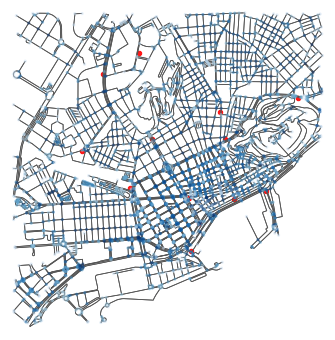

In [98]:
G = ox.graph_from_point((38.3459813, -0.49069405), distance=1500, network_type='walk')
node_degree_centrality = nx.degree_centrality(G)

df = pd.DataFrame(data=pd.Series(node_degree_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='Blues', start=0.2) #cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
#####Layer 1: 
fig, ax = ox.plot_graph(G, node_size=10, node_color=nc, node_edgecolor='none', node_zorder=2,node_alpha=0.5, #bgcolor='#e0e0e0',
                        edge_color='#555555', edge_linewidth=0.8, edge_alpha=1, show=False, close=False)

#####Layer 2: Plot POIs : Retrieve the list of lon and lat from dataframe "pois2"
amenityTags = '"amenity" = "bicycle_rental"' 
pois2= osm.node_query(south, west, north, east, tags= '{}'.format(amenityTags)) 
pois2_lon = []
pois2_lat = []
pois2_lon = list(pois2['lon'])
pois2_lat = list(pois2['lat'])

x_pois = list(pois2['lon'])
y_pois = list(pois2['lat'])
ax.scatter(x_pois, y_pois, c = 'red', s = 20, alpha=0.9)

#####Layer 3 : Plot INTERSECTIONS 
#####https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category
# ax.scatter(x = intersection_lon_list2, y = intersection_lat_list2, zorder=2, 
#                c= pois2_n_interestions['node_near_pois_list2'],
#                #color=gdf_intersections2['node_near_intersections'], #ValueError: 'color' kwarg must be an mpl color spec or sequence of color specs. For a sequence of values to be color-mapped, use the 'c' argument instead.
#                edgecolors='k', s = 25)
plt.show()

### 8.2 Closeness centrality

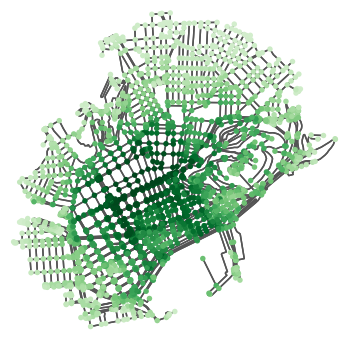

In [25]:
G = ox.graph_from_point((38.346731, -0.483661), distance=1500, network_type='walk')

#############define 等時圈

center_node = ox.get_nearest_node(G, (38.346731, -0.483661))

meters_per_minute = 5 * 1000 / 60 # 每小時10公里
for u, v, k, data in G.edges(data=True, keys=True):
    data['time'] = data['length'] / meters_per_minute
    
trip_times = [10, 15, 20] #分鐘

iso_colors = ox.get_colors(n=len(trip_times), cmap='pink', start=0.3, return_hex=True)
node_colors = {}

#####color only 10min trip  : radius value = 10
radius_value = 20

for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, center_node, radius=radius_value, distance='time')      ###改變radius的value: trip_time, 10, 15, 20

# node closeness centrality
node_closeness_centrality = nx.closeness_centrality(subgraph)

# plot it
df = pd.DataFrame(data=pd.Series(node_closeness_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='Greens', start=0.2)
df = df.reindex(subgraph.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(subgraph, node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)

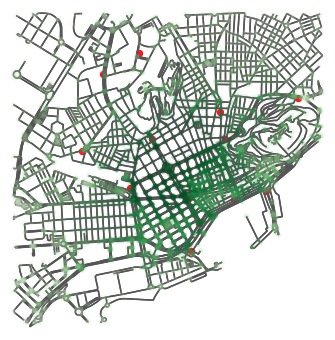

In [116]:
G = ox.graph_from_point((38.3459813, -0.49069405), distance=1500, network_type='walk')
node_closeness_centrality = nx.closeness_centrality(G)

df = pd.DataFrame(data=pd.Series(node_closeness_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='Greens', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()

# plot it
fig, ax = ox.plot_graph(G, node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,node_alpha=0.2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1, show=False, close=False)

#####Layer 2: Plot POIs : Retrieve the list of lon and lat from dataframe "pois2"
amenityTags = '"amenity" = "bicycle_rental"' 
pois2= osm.node_query(south, west, north, east, tags= '{}'.format(amenityTags)) 
pois2_lon = []
pois2_lat = []
pois2_lon = list(pois2['lon'])
pois2_lat = list(pois2['lat'])

x_pois = list(pois2['lon'])
y_pois = list(pois2['lat'])
ax.scatter(x_pois, y_pois, c = 'red', s = 40, alpha=0.9)

#####Layer 3 : Plot INTERSECTIONS 
#####https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category
# ax.scatter(x = intersection_lon_list2, y = intersection_lat_list2, zorder=2, 
#                c= pois2_n_interestions['node_near_pois_list2'],
#                #color=gdf_intersections2['node_near_intersections'], #ValueError: 'color' kwarg must be an mpl color spec or sequence of color specs. For a sequence of values to be color-mapped, use the 'c' argument instead.
#                edgecolors='k', s = 25)
plt.show()

### 8.3 Betweenness centrality

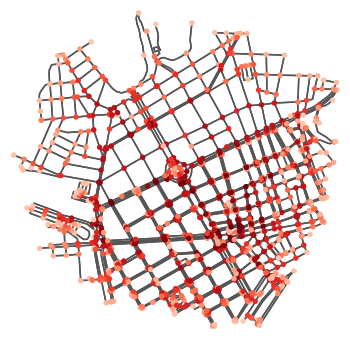

In [129]:
G = ox.graph_from_point((38.3459813, -0.49069405), distance=1500, network_type='walk')

#############define 等時圈

center_node = ox.get_nearest_node(G, (38.3459813, -0.49069405))

meters_per_minute = 5 * 1000 / 60 # 每小時10公里
for u, v, k, data in G.edges(data=True, keys=True):
    data['time'] = data['length'] / meters_per_minute
    
trip_times = [10, 15, 20] #分鐘

iso_colors = ox.get_colors(n=len(trip_times), cmap='Reds', start=0.5, return_hex=True)
node_colors = {}

#####color only 10min trip  : radius value = 10
radius_value = 10

for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, center_node, radius=radius_value, distance='time')      ###改變radius的value: trip_time, 10, 15, 20
    
# node betweenness centrality
G2 = nx.DiGraph(subgraph)

node_betweenness_centrality = nx.betweenness_centrality(G2, weight='length',normalized=True)

# plot it
df = pd.DataFrame(data=pd.Series(node_betweenness_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='Reds', start=0.2)
df = df.reindex(G2.nodes())
nc = df['colors'].tolist()
#####!!!!!!use "subgraph" and NOT "subgraph_DiGraph"
fig, ax = ox.plot_graph(subgraph, node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)

In [121]:
G = ox.graph_from_point((38.3459813, -0.49069405), distance=1500, network_type='walk')

G2 = nx.DiGraph(G)


In [ ]:
node_betweenness_centrality = nx.betweenness_centrality(G2, weight='length',normalized=True)

In [131]:

df = pd.DataFrame(data=pd.Series(node_betweenness_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='Purples', start=0)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()

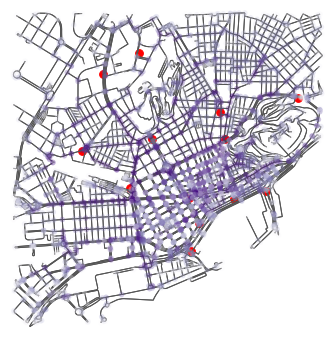

In [141]:
# Layer 1
fig, ax = ox.plot_graph(G, node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,node_alpha=0.3,
                        edge_color='#555555', edge_linewidth=1, edge_alpha=1, show=False, close=False)


#####Layer 2: Plot POIs : Retrieve the list of lon and lat from dataframe "pois2"
amenityTags = '"amenity" = "bicycle_rental"' 
pois2= osm.node_query(south, west, north, east, tags= '{}'.format(amenityTags)) 
pois2_lon = []
pois2_lat = []
pois2_lon = list(pois2['lon'])
pois2_lat = list(pois2['lat'])

x_pois = list(pois2['lon'])
y_pois = list(pois2['lat'])
ax.scatter(x_pois, y_pois, c = 'red', s = 60, alpha=1)

plt.show()

# Stat 
https://notebooks.azure.com/bradcavanagh/projects/osmnx-examples/html/notebooks/06-example-osmnx-networkx.ipynb

In [128]:
#####To calculate density-based metrics, you must also pass the network's bounding area in square meters (otherwise basic_stats() will just skip them in the calculation):
##### get the street network for a place, and its area in square meters

G = ox.graph_from_point((38.3459813, -0.49069405), distance=1500, network_type='walk')

stats_basic = ox.stats.basic_stats(G, area=2250000, clean_intersects=False, tolerance=15, circuity_dist='gc')
#!!!!!!!if clean_intersections = False, 不會計算intersection
df_stats_basic = pd.DataFrame.from_dict(stats_basic) 
stats_extended = ox.extended_stats(G, connectivity=True, anc=False, ecc=False, bc=True, cc=True) #anc & ecc are slow
df_stats_extended = pd.DataFrame.from_dict(stats_extended)

##### calculate basic and extended network stats, merge them together, and display
#stats = ox.basic_stats(G, area=2250000)
#extended_stats = ox.extended_stats(G, ecc=True, bc=True, cc=True)
#for key, value in extended_stats.items():
#    stats[key] = value
#pd.Series(stats)

#####Select isochrone = 10min
radius_value = 10

for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph_10 = nx.ego_graph(G, center_node, radius=radius_value, distance='time')      ###改變radius的value: trip_time, 10, 15, 20

stats_basic_10 = ox.stats.basic_stats(subgraph_10, area=None, clean_intersects=False, tolerance=15, circuity_dist='gc')
df_stats_basic_10 = pd.DataFrame.from_dict(stats_basic_10) 
stats_extended_10 = ox.extended_stats(subgraph_10, connectivity=False, anc=False, ecc=False, bc=False, cc=False)
df_stats_extended_10 = pd.DataFrame.from_dict(stats_extended) 

#####Select isochrone = 15min
radius_value = 15

for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph_15 = nx.ego_graph(G, center_node, radius=radius_value, distance='time')      ###改變radius的value: trip_time, 10, 15, 20

stats_basic_15 = ox.stats.basic_stats(subgraph_15, area=None, clean_intersects=False, tolerance=15, circuity_dist='gc')
df_stats_basic_15 = pd.DataFrame.from_dict(stats_basic_15) 
stats_extended_15 = ox.extended_stats(subgraph_15, connectivity=False, anc=False, ecc=False, bc=False, cc=False)
df_stats_extended_15 = pd.DataFrame.from_dict(stats_extended_15) 

#####Select isochrone = 20min
radius_value = 20

for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph_20 = nx.ego_graph(G, center_node, radius=radius_value, distance='time')      ###改變radius的value: trip_time, 10, 15, 20

#####Turn into dataframe
stats_basic_20 = ox.stats.basic_stats(subgraph_20, area=None, clean_intersects=False, tolerance=15, circuity_dist='gc')
df_stats_basic_20 = pd.DataFrame.from_dict(stats_basic_20) 
stats_extended_20 = ox.extended_stats(subgraph_20, connectivity=False, anc=False, ecc=False, bc=False, cc=False)
df_stats_extended_20 = pd.DataFrame.from_dict(stats_extended_20) 

writer = pd.ExcelWriter('E:/Walkability around bus stops/isochrone/isochrone.xlsx', engine='xlsxwriter')

df_stats_basic.to_excel(writer, sheet_name='Sheet1', startcol=0, startrow=0,header = True, index = True )
df_stats_extended.to_excel(writer, sheet_name='Sheet1', startcol=22, startrow=0, header = True, index = True)

df_stats_basic_20.to_excel(writer, sheet_name='Sheet1', startcol=0, startrow=2, header = False, index = True)
df_stats_extended_20.to_excel(writer, sheet_name='Sheet1', startcol=22, startrow=2, header = False, index = True)

df_stats_basic_15.to_excel(writer, sheet_name='Sheet1', startcol=0, startrow=3, header = False, index = True)
df_stats_extended_15.to_excel(writer, sheet_name='Sheet1', startcol=22, startrow=3, header = False, index = True)

df_stats_basic_10.to_excel(writer, sheet_name='Sheet1', startcol=0, startrow=4, header = False, index = True)
df_stats_extended_10.to_excel(writer, sheet_name='Sheet1', startcol=22, startrow=4, header = False, index = True)

writer.save()

# Color edge by their own attributes

In [334]:
G = ox.graph_from_point(point, distance=dist, network_type=networkType)

#####turn multigraph into dataframe
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_edges

#####save dataframe to excel file
writer = pd.ExcelWriter('D:/Thesis/edges_attributes.xlsx', engine='xlsxwriter')
gdf_edges.to_excel(writer, sheet_name='Sheet1', startcol=0, startrow=0,header = True, index = True )
writer.save()

In [175]:
#Get attribute method 1 : https://stackoverflow.com/questions/43830767/check-which-edge-attributes-exist-networkx/44765586   
edge_attributes = ox.graph_to_gdfs(G, nodes=False).columns
print(edge_attributes)

Index(['u', 'v', 'key', 'osmid', 'highway', 'oneway', 'length', 'geometry',
       'lanes', 'name', 'maxspeed', 'service', 'tunnel', 'junction', 'bridge',
       'width', 'access'],
      dtype='object')


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

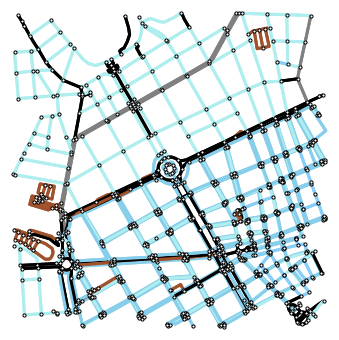

In [13]:
ec5 = ['skyblue'           if data['highway']=='footway'               
      else 'paleturquoise' if data['highway']=='residential' 
      else 'orange'        if data['highway']=='cycleway' 
      else 'sienna'        if data['highway']=='service' 
      else 'lightgreen'    if data['highway']=='living street' 
      else 'grey'          if data['highway']=='secondary'
      else 'lightskyblue'  if data['highway']=='pedestrian'
      else 'black'         for u, v, key, data in G.edges(keys=True, data=True)] #https://stackoverflow.com/questions/56234047/osmnx-plot-a-network-on-an-interactive-web-map-with-different-colours-per-infra

fig, ax = ox.plot_graph(G, node_color='w', node_edgecolor='k', node_size=10, 
                           node_zorder=6, edge_color=ec5, edge_linewidth=3)

# Accessibility-Walkability

### 1. Find the north, south, east, west of bbox https://notebooks.azure.com/bradcavanagh/projects/osmnx-examples/html/notebooks/04-example-simplify-network.ipynb

In [2]:
dist = 500
point = (38.3459813, -0.49069405)

In [17]:
bbox1 = ox.bbox_from_point(point, distance=dist)
north, south, east, west = bbox1   #bbox1 is to find the boundary using oxmnx
bbox1, south, west, north, east

((38.35048314998173,
  38.34147944601904,
  -0.4849776469065278,
  -0.4964104877716314),
 38.34147944601904,
 -0.4964104877716314,
 38.35048314998173,
 -0.4849776469065278)

In [15]:
dir(bbox1)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']

In [16]:
north, south, east, west

(38.35048314998173,
 38.34147944601904,
 -0.4849776469065278,
 -0.4964104877716314)

In [18]:
# bbox2 = [38.33247572606046, -0.5078434670348404, 38.359486837946314, -0.47354494506856737]  #lat-long bounding box 
distance = dist   #max distance in meters

##### first download the points of interest corresponding to the specified amenity type
#####1. 第一種方式
amenity = 'restaurant' #accessibility to this type of amenity
pois = osm.node_query(south, west, north, east, tags= '"amenity" = "{}"'.format(amenity))
#pois = osm.node_query(bbox[0], bbox[1], bbox[2], bbox[3], tags= '"amenity" ~ "{}"'.format(amenity))
#pois = osm.node_query(bbox[0], bbox[1], bbox[2], bbox[3], tags= "amenity")

#####2.第二種方式
#osm_tags = '"amenity"~"{}"'.format('|'.join(amenity)) #https://www.gitmemory.com/issue/gboeing/urban-data-science/8/488323284
#pois = osm.node_query(bbox[0], bbox[1], bbox[2], bbox[3], tags= osm_tags )

#####3. 第三種方式
#pois = osm.node_query(bbox[0], bbox[1], bbox[2], bbox[3], tags= '"amenity" = "restaurant"') 
#pois = osm.node_query(bbox[0], bbox[1], bbox[2], bbox[3], tags= "amenity = pub")

pois['amenity'].value_counts()
#pois[['amenity', 'name', 'lat', 'lon']].tail()
pois['lon']
pois

lat       lon     amenity  \
id                                            
270744472   38.346877 -0.494505  restaurant   
452158548   38.342462 -0.494131  restaurant   
518498625   38.345292 -0.485122  restaurant   
518498642   38.347102 -0.487199  restaurant   
588961553   38.347073 -0.488306  restaurant   
588981931   38.346643 -0.489498  restaurant   
589013331   38.345827 -0.490021  restaurant   
589030903   38.345487 -0.489639  restaurant   
774051186   38.341564 -0.487725  restaurant   
774051195   38.342305 -0.488278  restaurant   
774051199   38.342120 -0.488138  restaurant   
829998253   38.347595 -0.485126  restaurant   
956322815   38.347724 -0.489505  restaurant   
1317197203  38.349374 -0.486771  restaurant   
1515792900  38.349096 -0.486599  restaurant   
1527222194  38.344462 -0.495856  restaurant   
1769414668  38.347671 -0.488167  restaurant   
2125289228  38.344974 -0.493071  restaurant   
2209140920  38.344993 -0.486188  restaurant   
2718800708  38.342648 -0.485330  restaurant   
2841484808  38.349007 -0.486847  restaurant   
2841484809  38.348822 -0.486801  restaurant   
2852346338  38.342949 -0.485020  restaurant   
2883829102  38.343710 -0.490460  restaurant   
2884741703  38.345066 -0.487178  restaurant   
3005899922  38.344832 -0.486247  restaurant   
3226352784  38.350356 -0.486471  restaurant   
3226352785  38.350354 -0.486328  restaurant   
3226374982  38.345053 -0.487234  restaurant   
3843637766  38.344820 -0.491273  restaurant   
4113723200  38.347202 -0.490932  restaurant   
4737103822  38.347897 -0.488543  restaurant   
4737108221  38.347344 -0.487644  restaurant   
5133147525  38.343769 -0.485483  restaurant   
5588203221  38.344896 -0.488656  restaurant   
5608687722  38.343013 -0.487591  restaurant   
5790054153  38.345541 -0.485412  restaurant   
5836895760  38.347484 -0.488235  restaurant   
5836897881  38.347386 -0.488014  restaurant   
6164807985  38.342161 -0.488176  restaurant   
6175308786  38.345095 -0.486581  restaurant   
6175309722  38.345130 -0.486417  restaurant   
6393642498  38.342841 -0.490093  restaurant   
6393642504  38.343738 -0.486649  restaurant   
6393861675  38.345765 -0.485671  restaurant   
6433819910  38.346032 -0.491926  restaurant   
6433819913  38.348156 -0.491007  restaurant   
6433820162  38.349205 -0.486921  restaurant   
6433820476  38.348404 -0.487326  restaurant   
6433820732  38.341922 -0.491720  restaurant   
6534097047  38.343362 -0.485394  restaurant   
6534097048  38.343491 -0.485469  restaurant   
6572396186  38.344922 -0.487177  restaurant   
6689789903  38.342642 -0.486326  restaurant   
6690372562  38.348031 -0.487018  restaurant   
6690409558  38.348329 -0.487950  restaurant   
6741881389  38.347698 -0.487467  restaurant   
6960330689  38.348172 -0.487904  restaurant   
6977337985  38.344232 -0.492225  restaurant   
7001803494  38.350366 -0.486604  restaurant   

                                         name                 cuisine smoking  \
id                                                                              
270744472                 restaurante astorga                     NaN     NaN   
452158548                              Piripi                     NaN     NaN   
518498625                         Nou Manolín                     NaN     NaN   
518498642                        El jumillano                     NaN     NaN   
588961553                            Lizarrán                regional     NaN   
588981931                         El Merengue                     NaN     NaN   
589013331               La Taberna de Luceros                     NaN     NaN   
589030903                           Zhong Hua                 chinese     NaN   
774051186                               Kebap                 turkish     NaN   
774051195                 Restaurante Oriente                 chinese     NaN   
774051199                      Orient Express                 chinese     NaN   
829998253                              Pilsen     

In [19]:
# query the OSM API for the street network within the specified bounding box

import os
os.environ['PROJ_LIB']=r"C:\Users\a\Anaconda\Library\share"
#####出現以下 error message: 
#####             _proj.pyx in _proj.Proj.__cinit__ (_proj.c:1170)()
#####             RuntimeError: b'no arguments in initialization list'
#####Solution1: 看ycebear的回答在 https://github.com/pyproj4/pyproj/issues/134
#####Solution2: https://stackoverflow.com/questions/55739427/osmnx-ox-graph-from-place-runtimeerror-bno-argument-in-initialization-list/55806843#55806843
#os.environ['PROJ_LIB']=r"C:\Users\a\Anaconda\envs\os\Library\share"

#####額外找到的
#conda install pyproj
#import pyproj
#from pyproj import Proj

#network = osm.network_from_bbox(bbox[0], bbox[1], bbox[2], bbox[3])  ##這是原來的code但是已過期
#####Error message  : AttributeError: 'tuple' object has no attribute 'set_pois'
#####新版本在https://udst.github.io/pandana/loaders.html
#####要使用新版本，network才有node_ids這個attribute，才能計算len()以及接下來對network的query
network = osm.pdna_network_from_bbox(south, west, north, east) #####新版本的code

#network                  #####print network
#dir(network)            ##### Find all attributes of network
#hasattr('network', 'x') #####Check whether an attribute exist in network

Requesting network data within bounding box from Overpass API in 1 request(s)
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](38.34147945,-0.49641049,38.35048315,-0.48497765);>;);out;'}"
Downloaded 445.3KB from www.overpass-api.de in 1.81 seconds
Downloaded OSM network data within bounding box from Overpass API in 1 request(s) and 2.23 seconds
Returning OSM data with 2,735 nodes and 719 ways...
Edge node pairs completed. Took 2.40 seconds
Returning processed graph with 1,183 nodes and 1,934 edges...
Completed OSM data download and Pandana node and edge table creation in 5.53 seconds


In [20]:
dir(network)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_imp_name_to_num',
 '_node_indexes',
 '_twoway',
 'aggregate',
 'aggregations',
 'bbox',
 'decays',
 'edges_df',
 'from_hdf5',
 'get_node_ids',
 'impedance_names',
 'init_pois',
 'kdtree',
 'low_connectivity_nodes',
 'nearest_pois',
 'net',
 'node_ids',
 'node_idx',
 'nodes_df',
 'plot',
 'poi_category_indexes',
 'poi_category_names',
 'precompute',
 'save_hdf5',
 'set',
 'set_pois',
 'shortest_path',
 'variable_names']

In [21]:
# how many network nodes did we get for this bounding box?
len(network.node_ids)

1183

In [22]:
# identify nodes that are connected to fewer than some threshold of other nodes within a given distance
# do nothing with this for now, but see full example in other notebook for more
lcn = network.low_connectivity_nodes(impedance=1000, count=10, imp_name='distance')

# precomputes the range queries (the reachable nodes within this maximum distance)
# so, as long as you use a smaller distance, cached results will be used
network.precompute(distance + 1)

# initialize the underlying C++ points-of-interest engine
network.init_pois(num_categories=1, max_dist=distance, max_pois=7)

In [23]:
# initialize a category for this amenity with the locations specified by the lon and lat columns
network.set_pois(category='my_amenity', x_col=pois['lon'], y_col=pois['lat'])

Reading parameters from init_pois()
Reading parameters from init_pois()


In [24]:
# search for the n nearest amenities to each node in the network
access = network.nearest_pois(distance=distance, category='my_amenity', num_pois=7)

# each df cell represents the network distance from the node to each of the n POIs
access.head()

1           2           3           4           5  \
id                                                                      
21323870   161.121994  217.897003  229.973999  243.733002  243.733002   
21323871   179.949997  236.725006  248.802002  262.561005  262.561005   
219235930  174.266006  231.041000  243.117996  256.877014  256.877014   
219237037   87.778999  114.757004  115.808998  115.824997  150.820007   
219237075   49.001999   83.997002  104.695000  140.332993  158.270996   

                    6           7  
id                                 
21323870   247.414001  252.727005  
21323871   266.242004  271.554993  
219235930  260.558014  265.871002  
219237037  211.369003  228.182999  
219237075  197.839996  240.419998

In [25]:
# keyword arguments to pass for the matplotlib figure
bbox_aspect_ratio = (north - south) / (east - west)
fig_kwargs = {'facecolor':'w', 
              'figsize':(10, 10 * bbox_aspect_ratio)}

# keyword arguments to pass for scatter plots
plot_kwargs = {'s':5, 
               'alpha':0.9, 
               'cmap':'viridis_r', 
               'edgecolor':'none'}

In [ ]:
import os
os.environ['PROJLIB'] = r'C:/Users/a/Anaconda/pkgs/proj4-5.2.0-h6538335_1006/Library/share'

import numpy as np

import mpl_toolkits
mpl_toolkits.__path__.append('C:/Users/a/Anaconda/Lib/site-packages/mpl_toolkits/basemap')
#from mpl_toolkits.basemap import basemap ### Original code
from mpl_toolkits import basemap


In [28]:

# plot the distance to the nth nearest amenity
n = 1
bbox2 = [south, west, north, east]
bmap, fig, ax = network.plot(access[n], bbox=bbox2, plot_kwargs=plot_kwargs, fig_kwargs=fig_kwargs)
#ax.set_axis_bgcolor('k')     ###orignal code. Too old. See : https://github.com/scikit-learn/scikit-learn/issues/10762
ax.set_facecolor('white')
ax.set_title('Walking distance (m) to nearest {} around Plaza de Los Luceros, Alicante'.format(amenity), fontsize=15)
#fig.savefig('images/accessibility-pub-east-bay.png', dpi=200, bbox_inches='tight')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\a\\Anaconda\\Library\\share\\epsg'

# multiple value of amenities

In [333]:
pois2 = ox.pois_from_point((38.33247572606046, -0.5078434670348404), distance=500,  amenities=["bar","cafe","pub"])
pois2['amenity'].value_counts()
pois2['geometry'].x
#dir(pois2.geometry)

1242093866   -0.509004
5556335139   -0.508320
dtype: float64

In [334]:
network.set_pois(category='my_amenity', x_col=pois2['geometry'].x, y_col = pois2['geometry'].y )

Reading parameters from init_pois()
Reading parameters from init_pois()


In [311]:
# search for the n nearest amenities to each node in the network
access = network.nearest_pois(distance=distance, category='my_amenity', num_pois=7)

# each df cell represents the network distance from the node to each of the n POIs
access.head()

1           2           3            4            5  \
id                                                                       
13843550  242.281998  338.576996  764.643005   970.007019  1083.947021   
21323845  337.072998  485.153015  535.661987  1084.386963  1152.604980   
21323852  522.416016  590.633972  632.708008   636.356018   636.356018   
21323865  213.462997  522.130005  622.715027   700.051025   712.317017   
21323866  314.591003  521.877991  715.742981   793.078979   805.344971   

                    6            7  
id                                  
13843550  1083.947021  1119.420044  
21323845  1198.327026  1198.327026  
21323852   684.937012   687.318970  
21323865   901.221008   904.963989  
21323866   900.968994   945.440979

In [312]:
# keyword arguments to pass for the matplotlib figure
bbox_aspect_ratio = (bbox[2] - bbox[0]) / (bbox[3] - bbox[1])
fig_kwargs = {'facecolor':'w', 
              'figsize':(10, 10 * bbox_aspect_ratio)}

# keyword arguments to pass for scatter plots
plot_kwargs = {'s':5, 
               'alpha':0.9, 
               'cmap':'viridis_r', 
               'edgecolor':'none'}

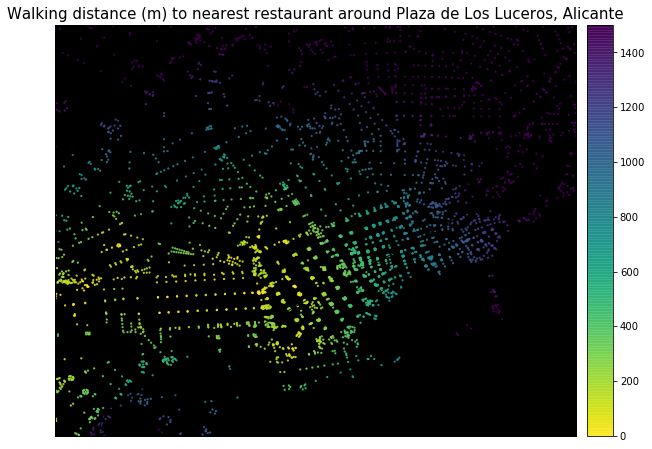

In [313]:
import os
os.environ['PROJLIB'] = r'C:/Users/a/Anaconda/pkgs/proj4-5.2.0-h6538335_1006/Library/share'

import numpy as np

import mpl_toolkits
mpl_toolkits.__path__.append('C:/Users/a/Anaconda/Lib/site-packages/mpl_toolkits/basemap')
#from mpl_toolkits.basemap import basemap ### Original code
from mpl_toolkits import basemap

# plot the distance to the nth nearest amenity
n = 1
bmap, fig, ax = network.plot(access[n], bbox=bbox, plot_kwargs=plot_kwargs, fig_kwargs=fig_kwargs)
#ax.set_axis_bgcolor('k')     ###orignal code. Too old. See : https://github.com/scikit-learn/scikit-learn/issues/10762
ax.set_facecolor('k')
ax.set_title('Walking distance (m) to nearest {} around Plaza de Los Luceros, Alicante'.format(amenity), fontsize=15)
#fig.savefig('images/accessibility-pub-east-bay.png', dpi=200, bbox_inches='tight')
plt.show()

# Alicante, Plaza del Ayuntamiento

Text(0.5, 1.0, 'bearning')

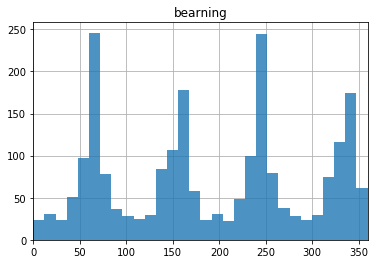

In [2]:
G = ox.graph_from_point((38.3450058, -0.48112878), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

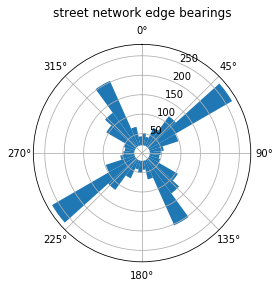

In [15]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# Alcoy, Plaza de Dins

Text(0.5, 1.0, 'bearning')

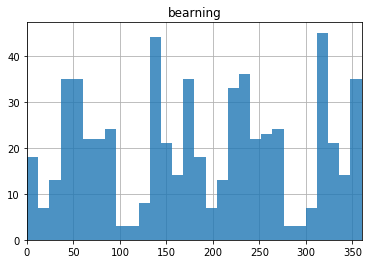

In [18]:
G = ox.graph_from_point((38.697963, -0.4737763), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

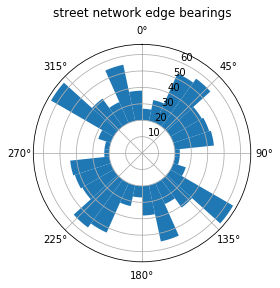

In [19]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# Alcoy,Plaza España

Text(0.5, 1.0, 'bearning')

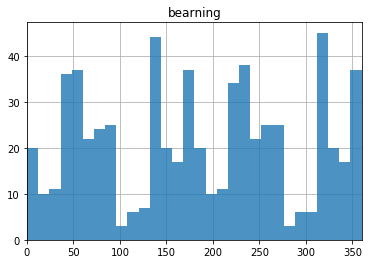

In [20]:
G = ox.graph_from_point((38.6977694, -0.47318459), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

In [2]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

NameError: name 'np' is not defined

# Alocy, Parque La Rosaleda

Text(0.5, 1.0, 'bearning')

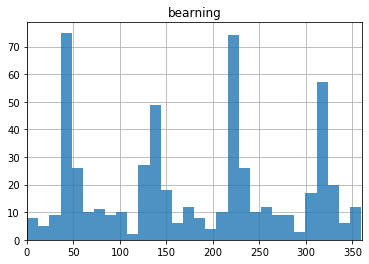

In [22]:
G = ox.graph_from_point((38.7024249, -0.477283), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

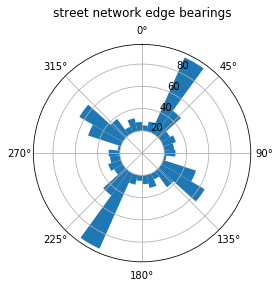

In [23]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# Alcoy, Plaza Al-Azraq

Text(0.5, 1.0, 'bearning')

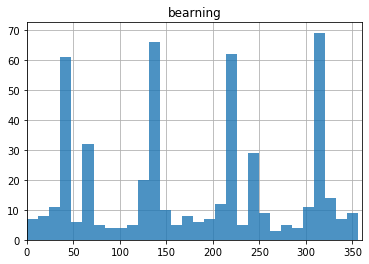

In [24]:
G = ox.graph_from_point((38.7084696, -0.46782617), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

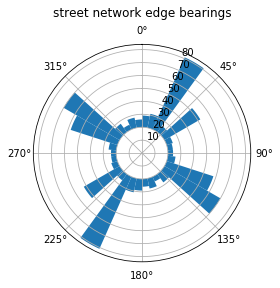

In [25]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# Beniform, Plaza Triangular

Text(0.5, 1.0, 'bearning')

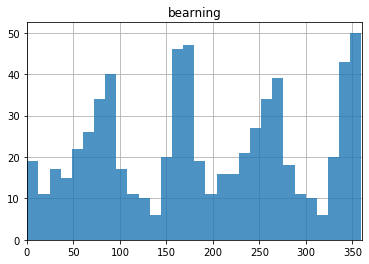

In [26]:
G = ox.graph_from_point((38.5372691, -0.12707233), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

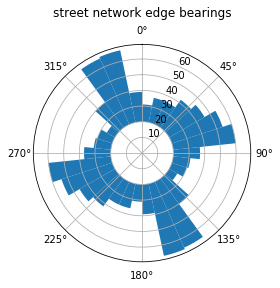

In [27]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# Beniform, Santa Margarita

Text(0.5, 1.0, 'bearning')

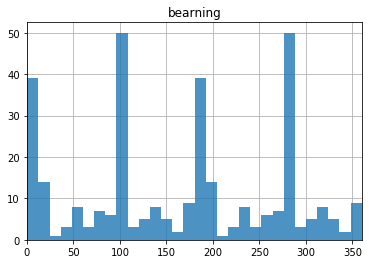

In [28]:
G = ox.graph_from_point((38.5363, -0.11506), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

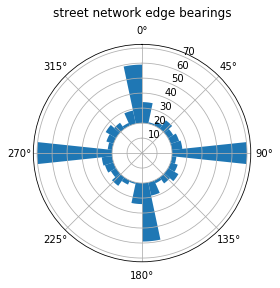

In [29]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# Elda, Plaza Mayor

Text(0.5, 1.0, 'bearning')

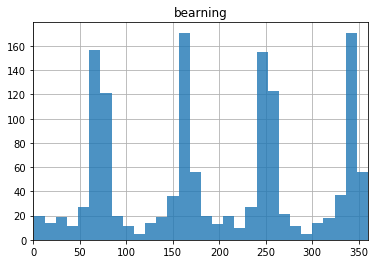

In [30]:
G = ox.graph_from_point((38.4783618, -0.79401514), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

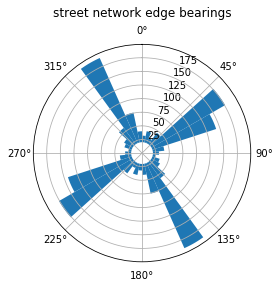

In [31]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# Elda, Plaza Castelar

Text(0.5, 1.0, 'bearning')

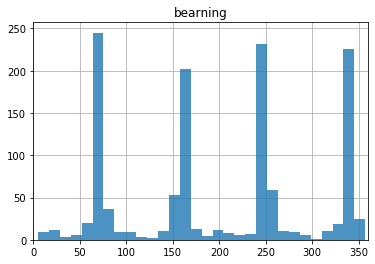

In [32]:
G = ox.graph_from_point((38.4787316, -0.79014034), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

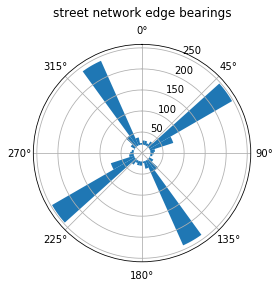

In [33]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# Elda, Plaza Del Zapatero

Text(0.5, 1.0, 'bearning')

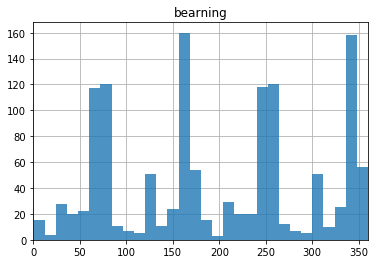

In [34]:
G = ox.graph_from_point((38.4761255, -0.79417776), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

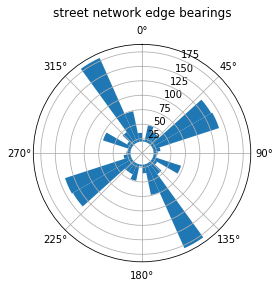

In [35]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# Elche, Plaza Glorieta

Text(0.5, 1.0, 'bearning')

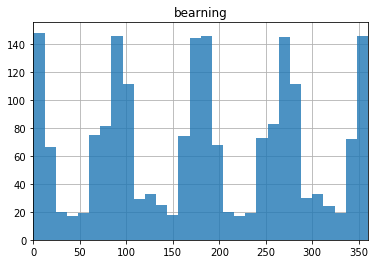

In [36]:
G = ox.graph_from_point((38.2657225, -0.69651604), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

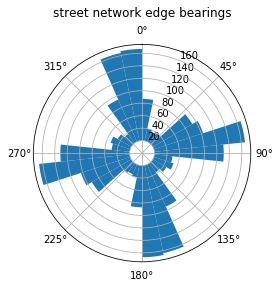

In [37]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# Elche, Plaza de Baix

Text(0.5, 1.0, 'bearning')

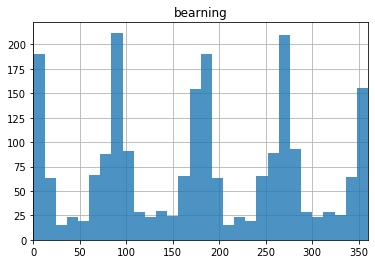

In [38]:
G = ox.graph_from_point((38.265272, -0.6987172), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

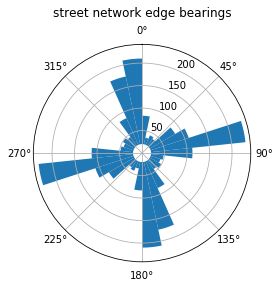

In [39]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# Plaza 2 : Orihuela, Glorieta Gabriel Miró
## 38.343352, -0.484987 

Text(0.5, 1.0, 'bearning')

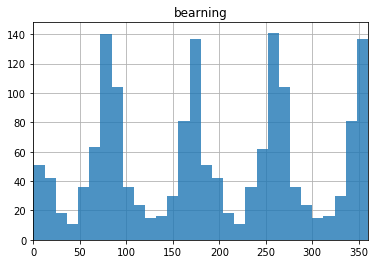

In [40]:
G = ox.graph_from_point((38.0822773, -0.94504759), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

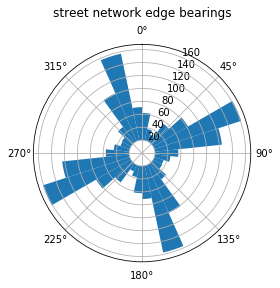

In [42]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

#  Plaza3 : de San Cristobal
## 38.346731, -0.483661 

# Orihuela,Placeta de Europa

Text(0.5, 1.0, 'bearning')

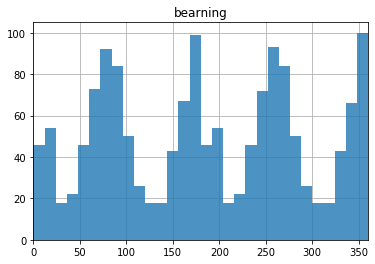

In [43]:
G = ox.graph_from_point((38.0846773, -0.94358794), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

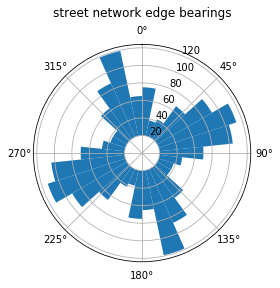

In [44]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# San Vicente, Sant Vicent del Raspeig

Text(0.5, 1.0, 'bearning')

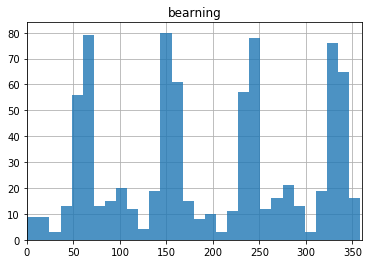

In [45]:
G = ox.graph_from_point((38.396366, -0.52496195), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

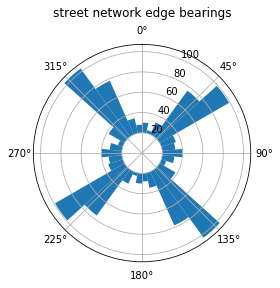

In [46]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# San Vicente,Parque Lo Torrent

Text(0.5, 1.0, 'bearning')

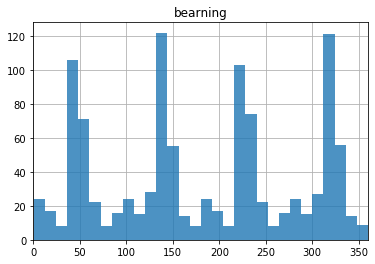

In [47]:
G = ox.graph_from_point((38.3937489, -0.51302068), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

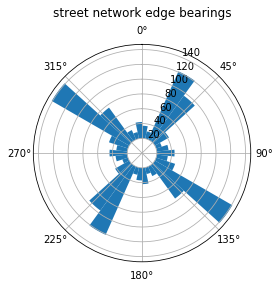

In [48]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# Torrevieja, Plaza de la Constitución

Text(0.5, 1.0, 'bearning')

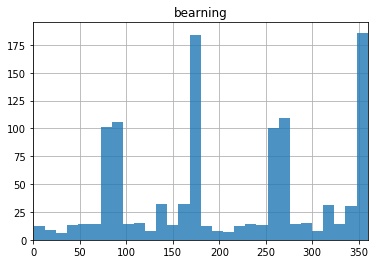

In [49]:
G = ox.graph_from_point((37.977618, -0.68269997), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

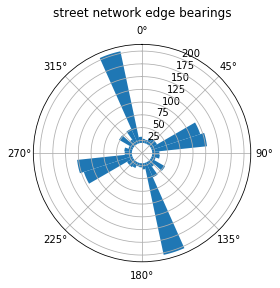

In [50]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# Torrevieja, Plaza Maria Asunción

Text(0.5, 1.0, 'bearning')

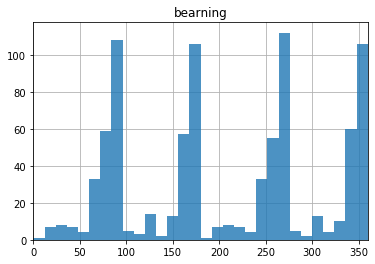

In [51]:
G = ox.graph_from_point((37.9807704, -0.6699553), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

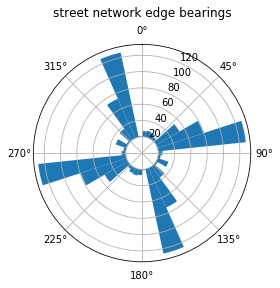

In [52]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)